In [1]:
! pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=31eb22fb3f64094152c3498fe2c4d2d2fb3d4be20ebada2179d9e2b33ba5ece5
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [2]:
!pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.8/238.8 kB 31.2 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=957f2f0b2554d45c0d2b94ec05f998a75e86362a79f99594392a8175d5f0d6bd
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hazm import Normalizer , word_tokenize
from googletrans import Translator
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import tensorflow as tf
import time
from transformers import TFAutoModelForSequenceClassification
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import  AutoTokenizer, AutoModelForSequenceClassification, AdamW
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import *
from tqdm import tqdm

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
tokenizer = AutoTokenizer.from_pretrained("sbunlp/fabert")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/552k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [5]:
df = pd.read_csv("/content/drive/MyDrive/HWE_2/original.csv")

In [6]:
df.columns = ['text', 'sentiment']

In [ ]:
df.head()

,text,sentiment
0,سلام خيلي خوبه بخرين.,2
1,از جمله قابلیت‌های ارتباطی HTC Desire SV می‌تو...,0
2,نهایتا، یک دوربین VGA نیز برای انجام مکالمات ...,0
3,من حدوداً ۱ ماهي‌ که مي‌شه اين گوشي رو دارم، ر...,1
4,اندازه نسبتاً مناسب و وزن خوب 4.,1


In [ ]:
X_train = np.array(df['text'])
y_train =np.array(df['sentiment'])
y_train[y_train >= 1] = 1
y_train[y_train <= -1] = 2

In [ ]:
normalizer = Normalizer()
df['tokenized'] = df['text'].apply(lambda x: word_tokenize(normalizer.normalize(x)))
df['num_tokens'] = df['tokenized'].apply(len)


In [ ]:
print(len(df))
print(df['num_tokens'].describe())

5560
count    5560.000000
mean       22.634532
std        20.403192
min         1.000000
25%        11.000000
50%        19.000000
75%        28.000000
max       320.000000
Name: num_tokens, dtype: float64


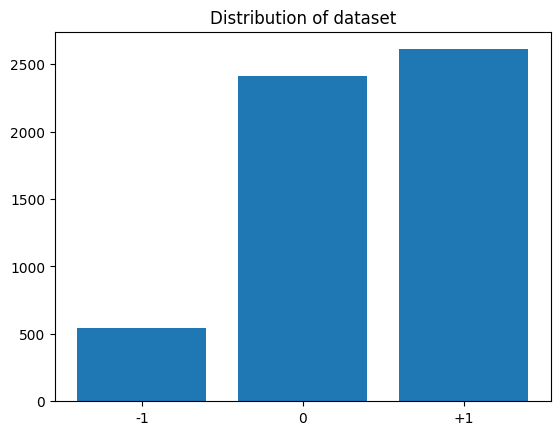

In [ ]:
data_distribution = {'-1': np.sum(y_train == 2) , '0' : np.sum(y_train == 0) , '+1' : np.sum(y_train == 1)}
plt.bar(data_distribution.keys() , data_distribution.values())
plt.title('Distribution of dataset');

In [7]:
translator = Translator()

ini = 0

def back_translate(text, src='fa', mid='en'):
    # print(isinstance(text, str))
    global ini
    ini += 1

    if not isinstance(text, str) or not text.strip():
        # print("ll")
        return text
    # print("jj")
    try:
        translated = translator.translate(text, src=src, dest=mid)
        if translated and translated.text:
            #time.sleep(1)
            back_translated = translator.translate(translated.text, src=mid, dest=src)
            print(end=f"{ini}\r")
            print(ini)
            # print("llll")
            return back_translated.text if back_translated and back_translated.text else text
        else:
            print("qq")
            return text
    except Exception as e:
        print("kkk")
        return text

In [8]:
df['back_translated_text'] = df['text'].apply(back_translate)

Streaming output truncated to the last 5000 lines.
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
7

In [ ]:
# print(df[['text', 'back_translated_text']].head(10))

In [9]:
df1 = pd.read_csv("/content/drive/MyDrive/HWE_2/test.csv")
df1.columns = ['text', 'sentiment']
test_texts = np.array(df1['text'])
test_labels =np.array(df1['sentiment'])
test_labels[test_labels >= 1] = 1
test_labels[test_labels <= -1] = 2

1853

In [10]:
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        # a = labels[10]
        # a = int(a)

        # a = torch.tensor(a, dtype=torch.long)
        # print(a)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = self.texts[index]
        label = int(self.labels[index])
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        label = torch.tensor(label, dtype=torch.long)
        return {
            'input_ids': torch.tensor(encoding['input_ids'].flatten()),
            'attention_mask': torch.tensor(encoding['attention_mask'].flatten()),
            'labels': label
}

In [ ]:
text_array = np.array(df['text'])


train_texts, val_texts, train_labels, val_labels = train_test_split(
    text_array, y_train, test_size=0.1, random_state=42
)

In [ ]:
train_dataset = TextDataset(train_texts, train_labels, tokenizer, 128)
val_dataset   = TextDataset(val_texts,  val_labels, tokenizer, 128)


train_dataloader = DataLoader(train_dataset, batch_size= 16, shuffle=True)
val_dataloader   = DataLoader(val_dataset, batch_size= 16,  shuffle=False)

In [11]:
test_dataset   = TextDataset(test_texts,  test_labels, tokenizer, 128)
test_dataloader   = DataLoader(test_dataset, batch_size= 16,  shuffle=False)

In [ ]:
# for i, batch in enumerate(train_dataloader):
#   print(i ,batch['input_ids'] , type(batch))
#   break

In [ ]:
# for i, batch in enumerate(train_dataloader):


#     input_ids = batch['input_ids']
#     attention_mask = batch['attention_mask']
#     labels = batch['labels']

#     print(f"Input IDs: {input_ids}")
#     print(f"Attention Mask: {attention_mask}")
#     print(f"Labels: {labels}")


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("sbunlp/fabert", num_labels=3)
model = model.to(device)
for param in model.parameters():
    param.requires_grad = False
for param in model.classifier.parameters():
    param.requires_grad = True
for param in model.bert.encoder.layer[-1].parameters():
    param.requires_grad = True
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

epochs = 5
def learn_one_step(model, optimizer, data, device, loss_func):
    input_ids = data['input_ids'].to(device)
    attention_mask = data['attention_mask'].to(device)
    labels = data['labels'].to(device)


    outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
    loss = outputs.loss
    logits = outputs.logits
    outputs_idx = logits.argmax(axis=1)
    accuracy = torch.mean((labels==outputs_idx).float())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    return accuracy.item(), loss.item()

def evaluate_one_step(net, data,  device, loss_func):
    with torch.no_grad():
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        outputs_idx = logits.argmax(axis=1)
        accuracy = torch.mean((labels==outputs_idx).float())

        return accuracy.item(), loss.item()

train_history_loss=[]
train_history_accuracy = []
val_history_loss=[]
val_history_accuracy = []
for epoch in range(epochs):
    print(f'Epoch {epoch+1}')



    batch_accuracies, batch_losses=[], []
    model.train()
    for i, data in enumerate(tqdm(train_dataloader)):

        batch_accuracy, batch_loss = learn_one_step(model, optimizer, data, device, loss_func)
        batch_accuracies.append(batch_accuracy)
        batch_losses.append(batch_loss)
    acc = torch.mean(torch.tensor(batch_accuracies))*100
    loss = torch.mean(torch.tensor(batch_losses))
    train_history_loss.append(loss)
    train_history_accuracy.append(acc)

    print('Train accuracy: {acc:.2f}%, Train loss: {loss:.4f}'.format(acc=acc, loss=loss))

    batch_accuracies, batch_losses=[], []
    model.eval()
    for i, data in enumerate(val_dataloader, 0):
        batch_accuracy, batch_loss = evaluate_one_step(model, data, device, loss_func)
        batch_accuracies.append(batch_accuracy)
        batch_losses.append(batch_loss)

    acc = torch.mean(torch.tensor(batch_accuracies))*100
    loss = torch.mean(torch.tensor(batch_losses))
    val_history_loss.append(loss)
    val_history_accuracy.append(acc)
    print('Validation accuracy: {acc:.2f}%, Validation loss: {loss:.4f}'.format(acc=acc, loss=loss))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sbunlp/fabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1


  0%|          | 0/313 [00:00<?, ?it/s]<ipython-input-17-c38b38a35bd2>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten()),
<ipython-input-17-c38b38a35bd2>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten()),
100%|██████████| 313/313 [01:12<00:00,  4.30it/s]


Train accuracy: 50.96%, Train loss: 0.9822
Validation accuracy: 56.67%, Validation loss: 0.9118
Epoch 2


100%|██████████| 313/313 [01:14<00:00,  4.20it/s]


Train accuracy: 61.01%, Train loss: 0.8685
Validation accuracy: 65.18%, Validation loss: 0.8032
Epoch 3


100%|██████████| 313/313 [01:14<00:00,  4.20it/s]


Train accuracy: 70.12%, Train loss: 0.7446
Validation accuracy: 71.07%, Validation loss: 0.7015
Epoch 4


100%|██████████| 313/313 [01:14<00:00,  4.21it/s]


Train accuracy: 72.94%, Train loss: 0.6651
Validation accuracy: 73.10%, Validation loss: 0.6404
Epoch 5


100%|██████████| 313/313 [01:14<00:00,  4.21it/s]


Train accuracy: 73.89%, Train loss: 0.6213
Validation accuracy: 74.17%, Validation loss: 0.6020


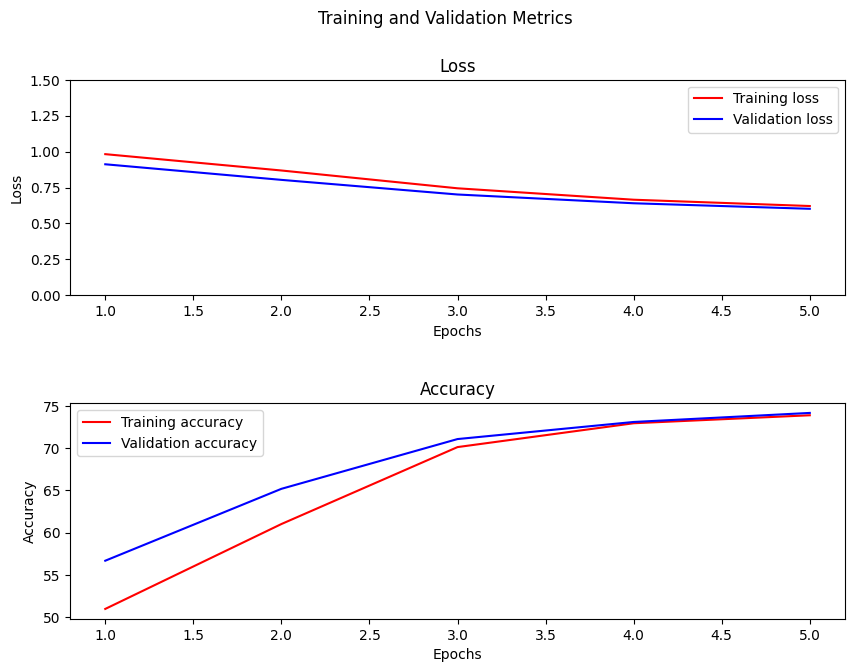

In [ ]:
train_loss = train_history_loss
val_loss = val_history_loss
train_acc = train_history_accuracy
val_acc = val_history_accuracy

epochs = range(1, len(train_loss) + 1)

fig, axs = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Training and Validation Metrics')


axs[0].plot(epochs, train_loss, label='Training loss', c='red')
axs[0].plot(epochs, val_loss, label='Validation loss', c='blue')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_ylim([0, 1.5])


axs[1].plot(epochs, train_acc, label='Training accuracy', c='red')
axs[1].plot(epochs, val_acc, label='Validation accuracy', c='blue')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.subplots_adjust(hspace=0.5)
plt.show()

<ipython-input-17-c38b38a35bd2>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten()),
<ipython-input-17-c38b38a35bd2>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten()),


f1: 0.7011495080467086
f1: 0.5207915519448882


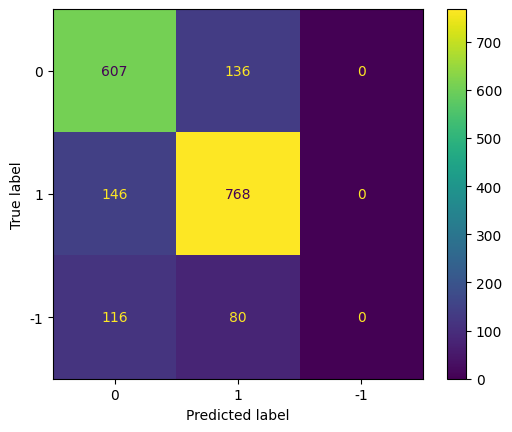

In [ ]:
def get_model_predictions(model, data,  device):
    with torch.no_grad():
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['labels'].to(device)


        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        outputs_idx = logits.argmax(axis=1)
        return outputs_idx.cpu().tolist()

model.eval()
eval_outputs=[]
eval_labels=[]
for i, data in enumerate(test_dataloader, 0):
    outputs_idx = get_model_predictions(model, data,  device)

    eval_outputs+=outputs_idx
    eval_labels+=data['labels'].tolist()
ConfusionMatrixDisplay(confusion_matrix(eval_labels, eval_outputs), display_labels=['0', '1', '-1']).plot()
print("f1:",f1_score(eval_labels, eval_outputs, average='weighted'))
print("f1:",f1_score(eval_labels, eval_outputs, average='macro'))

In [20]:
text_array = np.array(df['text'])
back_translated_array = np.array(df['back_translated_text'])


combined_texts = np.concatenate((text_array, back_translated_array))


combined_labels = np.concatenate((y_train, y_train))


train_texts1, val_texts1, train_labels1, val_labels1 = train_test_split(
    combined_texts, combined_labels, test_size=0.1, random_state=42
)

In [21]:
train_dataset1 = TextDataset(train_texts1, train_labels1, tokenizer, 128)
val_dataset1   = TextDataset(val_texts1,  val_labels1, tokenizer, 128)


train_dataloader1 = DataLoader(train_dataset1, batch_size=16, shuffle=True)
val_dataloader1   = DataLoader(val_dataset1, batch_size=16)

In [22]:
model1 = AutoModelForSequenceClassification.from_pretrained("sbunlp/fabert", num_labels=3)
model1 = model1.to(device)
for param in model1.parameters():
    param.requires_grad = False
for param in model1.classifier.parameters():
    param.requires_grad = True
for param in model1.bert.encoder.layer[-1].parameters():
    param.requires_grad = True
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model1.parameters(), lr=1e-5)

epochs = 5
def learn_one_step(model, optimizer, data, device, loss_func):
    input_ids = data['input_ids'].to(device)
    attention_mask = data['attention_mask'].to(device)
    labels = data['labels'].to(device)


    outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
    loss = outputs.loss
    logits = outputs.logits
    outputs_idx = logits.argmax(axis=1)
    accuracy = torch.mean((labels==outputs_idx).float())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    return accuracy.item(), loss.item()

def evaluate_one_step(model, data,  device, loss_func):
    with torch.no_grad():
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        outputs_idx = logits.argmax(axis=1)
        accuracy = torch.mean((labels==outputs_idx).float())

        return accuracy.item(), loss.item()

train_history_loss=[]
train_history_accuracy = []
val_history_loss=[]
val_history_accuracy = []
for epoch in range(epochs):
    print(f'Epoch {epoch+1}')



    batch_accuracies, batch_losses=[], []
    model1.train()
    for i, data in enumerate(tqdm(train_dataloader1)):

        batch_accuracy, batch_loss = learn_one_step(model1, optimizer, data, device, loss_func)
        batch_accuracies.append(batch_accuracy)
        batch_losses.append(batch_loss)
    acc = torch.mean(torch.tensor(batch_accuracies))*100
    loss = torch.mean(torch.tensor(batch_losses))
    train_history_loss.append(loss)
    train_history_accuracy.append(acc)

    print('Train accuracy: {acc:.2f}%, Train loss: {loss:.4f}'.format(acc=acc, loss=loss))

    batch_accuracies, batch_losses=[], []
    model1.eval()
    for i, data in enumerate(val_dataloader1, 0):
        batch_accuracy, batch_loss = evaluate_one_step(model1, data, device, loss_func)
        batch_accuracies.append(batch_accuracy)
        batch_losses.append(batch_loss)

    acc = torch.mean(torch.tensor(batch_accuracies))*100
    loss = torch.mean(torch.tensor(batch_losses))
    val_history_loss.append(loss)
    val_history_accuracy.append(acc)
    print('Validation accuracy: {acc:.2f}%, Validation loss: {loss:.4f}'.format(acc=acc, loss=loss))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sbunlp/fabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1


  0%|          | 0/626 [00:00<?, ?it/s]<ipython-input-10-c7ef97848ada>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten()),
<ipython-input-10-c7ef97848ada>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten()),
100%|██████████| 626/626 [01:18<00:00,  7.96it/s]


Train accuracy: 58.39%, Train loss: 0.9306
Validation accuracy: 70.62%, Validation loss: 0.7981
Epoch 2


100%|██████████| 626/626 [01:18<00:00,  7.97it/s]


Train accuracy: 71.79%, Train loss: 0.7047
Validation accuracy: 72.77%, Validation loss: 0.6086
Epoch 3


100%|██████████| 626/626 [01:18<00:00,  7.99it/s]


Train accuracy: 74.12%, Train loss: 0.6047
Validation accuracy: 74.64%, Validation loss: 0.5688
Epoch 4


100%|██████████| 626/626 [01:18<00:00,  7.98it/s]


Train accuracy: 75.34%, Train loss: 0.5617
Validation accuracy: 76.70%, Validation loss: 0.5417
Epoch 5


100%|██████████| 626/626 [01:18<00:00,  7.99it/s]


Train accuracy: 77.06%, Train loss: 0.5339
Validation accuracy: 78.04%, Validation loss: 0.5390


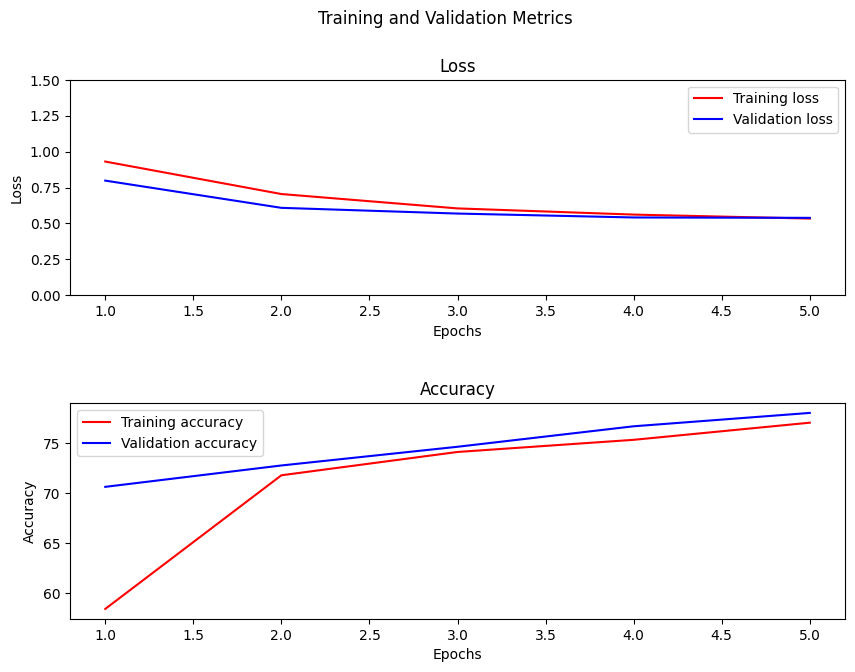

In [23]:
train_loss = train_history_loss
val_loss = val_history_loss
train_acc = train_history_accuracy
val_acc = val_history_accuracy

epochs = range(1, len(train_loss) + 1)

fig, axs = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Training and Validation Metrics')


axs[0].plot(epochs, train_loss, label='Training loss', c='red')
axs[0].plot(epochs, val_loss, label='Validation loss', c='blue')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_ylim([0, 1.5])


axs[1].plot(epochs, train_acc, label='Training accuracy', c='red')
axs[1].plot(epochs, val_acc, label='Validation accuracy', c='blue')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.subplots_adjust(hspace=0.5)
plt.show()

<ipython-input-10-c7ef97848ada>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten()),
<ipython-input-10-c7ef97848ada>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten()),


f1: 0.7655944809898417
f1: 0.6892485907419669


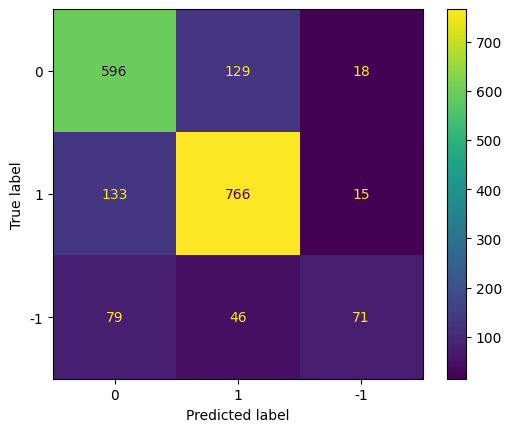

In [24]:
def get_model_predictions(model, data,  device):
    with torch.no_grad():
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['labels'].to(device)


        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        outputs_idx = logits.argmax(axis=1)
        return outputs_idx.cpu().tolist()

model1.eval()
eval_outputs=[]
eval_labels=[]
for i, data in enumerate(test_dataloader, 0):
    outputs_idx = get_model_predictions(model1, data,  device)

    eval_outputs+=outputs_idx
    eval_labels+=data['labels'].tolist()
ConfusionMatrixDisplay(confusion_matrix(eval_labels, eval_outputs), display_labels=['0', '1', '-1']).plot()
print("f1:",f1_score(eval_labels, eval_outputs, average='weighted'))
print("f1:",f1_score(eval_labels, eval_outputs, average='macro'))

In [ ]:
n = 0
for i in range(len(eval_outputs)) :
  if(eval_labels[i] != eval_outputs[i]):
    print(f"True Label: {eval_labels[i]}, Predicted Label: {eval_outputs[i]}")
    print(train_texts1[i])
    print("")
    n += 1
    if(n> 10):
      break

True Label: 2, Predicted Label: 0
گوشي ظريفيه موقع خريدش کاور فراموش نشه.

True Label: 1, Predicted Label: 0
تعامل هوشمندانه با کنترل صدا و حرکت فن‌آوری جدید و پیشرفته تعامل هوشمند به شما اجازه می‌دهد تا بدون نیاز به فشار دادن دکمه با تلویزیون خود کار کنید.

True Label: 1, Predicted Label: 0
به طوری که فقط دو دکمه بر روی بدنه ی آن دیده می شود که یکی از آن ها دکمه ی شاتر و دیگری دکمه ی رفتن به آپشن های مختلف است.

True Label: 0, Predicted Label: 1
امسال مایکروسافت با کنسول جدید خود به نام XBOX 360 توانست زودتر از رقیب خود سونی یک کنسول پیشرفته در اختیار کاربران یا به اصطلاح گیمرها قرار دهد.

True Label: 1, Predicted Label: 0
دیروز این دوربین رو از دیجی کالا خریدم فقط تا شب باهاش ​​کار میکردم و از هر نظر امتحانش کردم باید بگم که از خریدم بسیار راضی هستم چون کیفیت این دوربین فوق العاده است.

True Label: 2, Predicted Label: 0
پردازنده چهار هسته اي،  دوربين 8 مگا،  صفحه 4 اينچي،  دوربين مکالمه hd ،  1 گيگ رم و فقط 7.6 ميليمتر!

True Label: 0, Predicted Label: 1
اين دوست عزيزمون که تو نقد نو

In [ ]:
X_train = np.array(df['text'])
y_train =np.array(df['sentiment'])
y_train[y_train >= 1] = 1
y_train[y_train <= -1] = 2
X_n = X_train[y_train == 2]
X_N= np.concatenate((X_n, X_n, X_n, X_n, X_n))
y_N =(np.zeros(len(X_N)) + 2).astype(int)
X_z = X_train[y_train == 0]
y_z =(np.zeros(len(X_z))).astype(int)
X_p = X_train[y_train == 1]
y_p =(np.zeros(len(X_p)) + 1).astype(int)
X_train = np.concatenate((X_N,X_p, X_z))
y_train =np.concatenate((y_N,y_p, y_z))

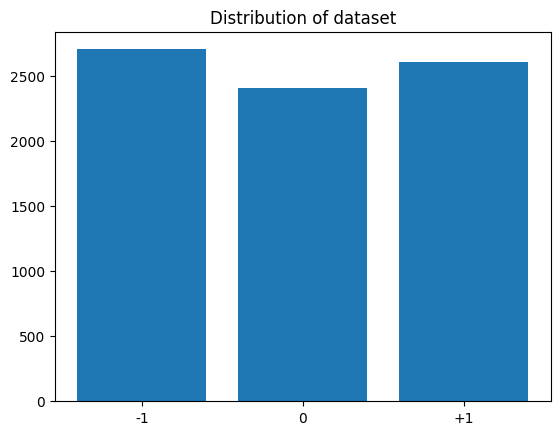

In [ ]:
data_distribution = {'-1': np.sum(y_train == 2) , '0' : np.sum(y_train == 0) , '+1' : np.sum(y_train == 1)}
plt.bar(data_distribution.keys() , data_distribution.values())
plt.title('Distribution of dataset');

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)
train_dataset = TextDataset(train_texts, train_labels, tokenizer, 128)
val_dataset   = TextDataset(val_texts,  val_labels, tokenizer, 128)


train_dataloader = DataLoader(train_dataset, batch_size= 16, shuffle=True)
val_dataloader   = DataLoader(val_dataset, batch_size= 16,  shuffle=False)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("sbunlp/fabert", num_labels=3)
model = model.to(device)
for param in model.parameters():
    param.requires_grad = False
for param in model.classifier.parameters():
    param.requires_grad = True
for param in model.bert.encoder.layer[-1].parameters():
    param.requires_grad = True
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

epochs = 5
def learn_one_step(model, optimizer, data, device, loss_func):
    input_ids = data['input_ids'].to(device)
    attention_mask = data['attention_mask'].to(device)
    labels = data['labels'].to(device)


    outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
    loss = outputs.loss
    logits = outputs.logits
    outputs_idx = logits.argmax(axis=1)
    accuracy = torch.mean((labels==outputs_idx).float())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    return accuracy.item(), loss.item()

def evaluate_one_step(model, data,  device, loss_func):
    with torch.no_grad():
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        outputs_idx = logits.argmax(axis=1)
        accuracy = torch.mean((labels==outputs_idx).float())

        return accuracy.item(), loss.item()

train_history_loss=[]
train_history_accuracy = []
val_history_loss=[]
val_history_accuracy = []
for epoch in range(epochs):
    print(f'Epoch {epoch+1}')



    batch_accuracies, batch_losses=[], []
    model.train()
    for i, data in enumerate(tqdm(train_dataloader)):

        batch_accuracy, batch_loss = learn_one_step(model, optimizer, data, device, loss_func)
        batch_accuracies.append(batch_accuracy)
        batch_losses.append(batch_loss)
    acc = torch.mean(torch.tensor(batch_accuracies))*100
    loss = torch.mean(torch.tensor(batch_losses))
    train_history_loss.append(loss)
    train_history_accuracy.append(acc)

    print('Train accuracy: {acc:.2f}%, Train loss: {loss:.4f}'.format(acc=acc, loss=loss))

    batch_accuracies, batch_losses=[], []
    model.eval()
    for i, data in enumerate(val_dataloader, 0):
        batch_accuracy, batch_loss = evaluate_one_step(model, data, device, loss_func)
        batch_accuracies.append(batch_accuracy)
        batch_losses.append(batch_loss)

    acc = torch.mean(torch.tensor(batch_accuracies))*100
    loss = torch.mean(torch.tensor(batch_losses))
    val_history_loss.append(loss)
    val_history_accuracy.append(acc)
    print('Validation accuracy: {acc:.2f}%, Validation loss: {loss:.4f}'.format(acc=acc, loss=loss))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sbunlp/fabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1


  0%|          | 0/435 [00:00<?, ?it/s]<ipython-input-17-c38b38a35bd2>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten()),
<ipython-input-17-c38b38a35bd2>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten()),
100%|██████████| 435/435 [00:56<00:00,  7.76it/s]


Train accuracy: 43.78%, Train loss: 1.0685
Validation accuracy: 50.97%, Validation loss: 1.0166
Epoch 2


100%|██████████| 435/435 [00:55<00:00,  7.85it/s]


Train accuracy: 55.69%, Train loss: 0.9521
Validation accuracy: 70.61%, Validation loss: 0.7805
Epoch 3


100%|██████████| 435/435 [00:55<00:00,  7.80it/s]


Train accuracy: 72.87%, Train loss: 0.7104
Validation accuracy: 76.10%, Validation loss: 0.5775
Epoch 4


100%|██████████| 435/435 [00:55<00:00,  7.83it/s]


Train accuracy: 75.95%, Train loss: 0.6173
Validation accuracy: 77.76%, Validation loss: 0.5208
Epoch 5


100%|██████████| 435/435 [00:55<00:00,  7.80it/s]


Train accuracy: 77.41%, Train loss: 0.5741
Validation accuracy: 78.49%, Validation loss: 0.4956


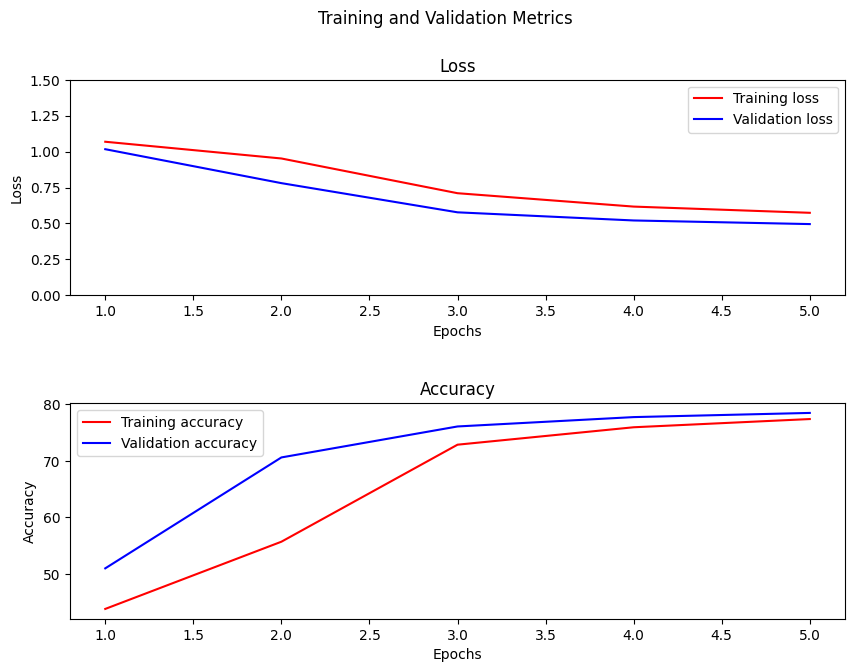

In [ ]:
train_loss = train_history_loss
val_loss = val_history_loss
train_acc = train_history_accuracy
val_acc = val_history_accuracy

epochs = range(1, len(train_loss) + 1)

fig, axs = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Training and Validation Metrics')


axs[0].plot(epochs, train_loss, label='Training loss', c='red')
axs[0].plot(epochs, val_loss, label='Validation loss', c='blue')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_ylim([0, 1.5])


axs[1].plot(epochs, train_acc, label='Training accuracy', c='red')
axs[1].plot(epochs, val_acc, label='Validation accuracy', c='blue')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.subplots_adjust(hspace=0.5)
plt.show()

<ipython-input-17-c38b38a35bd2>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten()),
<ipython-input-17-c38b38a35bd2>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten()),


f1: 0.7558341569038247
f1: 0.7010511174003443


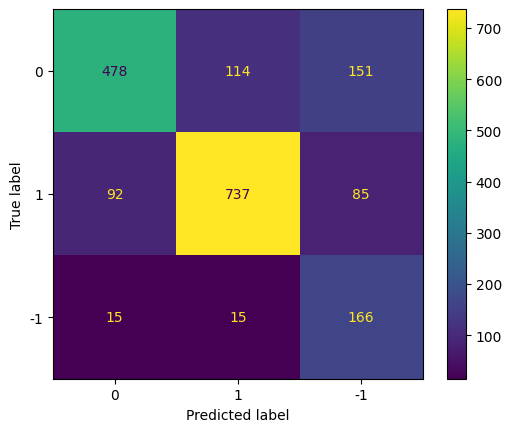

In [ ]:
def get_model_predictions(model, data,  device):
    with torch.no_grad():
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['labels'].to(device)


        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        outputs_idx = logits.argmax(axis=1)
        return outputs_idx.cpu().tolist()

model.eval()
eval_outputs=[]
eval_labels=[]
for i, data in enumerate(test_dataloader, 0):
    outputs_idx = get_model_predictions(model, data,  device)

    eval_outputs+=outputs_idx
    eval_labels+=data['labels'].tolist()
ConfusionMatrixDisplay(confusion_matrix(eval_labels, eval_outputs), display_labels=['0', '1', '-1']).plot()
print("f1:",f1_score(eval_labels, eval_outputs, average='weighted'))
print("f1:",f1_score(eval_labels, eval_outputs, average='macro'))

In [12]:
for i in range(50,60):
  print('text:')
  print(df['text'][i])
  print('back_translated_text:')
  print(df['back_translated_text'][i])
  print("")

text:
در نهايت بايد بگم ديجي کالا کارش درسته و ميدونه چي معرفي کنه
back_translated_text:
در پایان باید بگویم دیجی کالا کار خود را به خوبی انجام می دهد و می داند چه چیزی را معرفی کند

text:
با برنامه‌های کاربردی برای تندرستی - Fitness سامسونگ می‌توانید برنامه‌های ورزشی و تمرینی خود را در منزل اجرا کنید و با قابلیت برنامه‌های کاربردی برای خانواده - Family Story سامسونگ می‌توانید مطمئن باشید که لحظات و خاطرات ارزشمند خانوادگی نه تنها ذخیره می‌شوند بلکه توسط تلویزیون هوشمند شما به اشتراک گذاشته خواهند شد.
back_translated_text:
با اپلیکیشن های سلامتی - Samsung Fitness می توانید برنامه های ورزشی و تمرینی خود را در منزل اجرا کنید و با قابلیت اپلیکیشن های خانوادگی - Samsung Family Story می توانید مطمئن باشید که لحظات و خاطرات ارزشمند خانوادگی نه تنها ذخیره می شوند، بلکه به اشتراک گذاشته می شوند. توسط تلویزیون هوشمند شما گذاشته خواهد شد

text:
اصلا فکر نکنين که واسه بازي هاي آنلاين نياز به سرعت افسانه هاي دارين.
back_translated_text:
فکر نکنید که برای بازی های آنلاین به سرعت افسانه ای نیاز داری

In [13]:
text_array = np.array(df['text'])
back_translated_array = np.array(df['back_translated_text'])
y_train =np.array(df['sentiment'])
y_train[y_train >= 1] = 1
y_train[y_train <= -1] = 2

combined_texts = np.concatenate((text_array, back_translated_array))


combined_labels = np.concatenate((y_train, y_train))



X_n = combined_texts[combined_labels == 2]
X_N= np.concatenate((X_n, X_n, X_n, X_n, X_n))
y_N =(np.zeros(len(X_N)) + 2).astype(int)
X_z = combined_texts[combined_labels == 0]
y_z =(np.zeros(len(X_z))).astype(int)
X_p = combined_texts[combined_labels == 1]
y_p =(np.zeros(len(X_p)) + 1).astype(int)
combined_texts = np.concatenate((X_N,X_p, X_z))
combined_labels =np.concatenate((y_N,y_p, y_z))

train_texts1, val_texts1, train_labels1, val_labels1 = train_test_split(
    combined_texts, combined_labels, test_size=0.1, random_state=42
)

In [14]:
train_dataset1 = TextDataset(train_texts1, train_labels1, tokenizer, 128)
val_dataset1   = TextDataset(val_texts1,  val_labels1, tokenizer, 128)


train_dataloader1 = DataLoader(train_dataset1, batch_size=16, shuffle=True)
val_dataloader1   = DataLoader(val_dataset1, batch_size=16)

In [16]:
model1 = AutoModelForSequenceClassification.from_pretrained("sbunlp/fabert", num_labels=3)
model1 = model1.to(device)
for param in model1.parameters():
    param.requires_grad = False
for param in model1.classifier.parameters():
    param.requires_grad = True
for param in model1.bert.encoder.layer[-1].parameters():
    param.requires_grad = True
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model1.parameters(), lr=1e-5)

epochs = 5
def learn_one_step(model, optimizer, data, device, loss_func):
    input_ids = data['input_ids'].to(device)
    attention_mask = data['attention_mask'].to(device)
    labels = data['labels'].to(device)


    outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
    loss = outputs.loss
    logits = outputs.logits
    outputs_idx = logits.argmax(axis=1)
    accuracy = torch.mean((labels==outputs_idx).float())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    return accuracy.item(), loss.item()

def evaluate_one_step(model, data,  device, loss_func):
    with torch.no_grad():
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        outputs_idx = logits.argmax(axis=1)
        accuracy = torch.mean((labels==outputs_idx).float())

        return accuracy.item(), loss.item()

train_history_loss=[]
train_history_accuracy = []
val_history_loss=[]
val_history_accuracy = []
for epoch in range(epochs):
    print(f'Epoch {epoch+1}')



    batch_accuracies, batch_losses=[], []
    model1.train()
    for i, data in enumerate(tqdm(train_dataloader1)):

        batch_accuracy, batch_loss = learn_one_step(model1, optimizer, data, device, loss_func)
        batch_accuracies.append(batch_accuracy)
        batch_losses.append(batch_loss)
    acc = torch.mean(torch.tensor(batch_accuracies))*100
    loss = torch.mean(torch.tensor(batch_losses))
    train_history_loss.append(loss)
    train_history_accuracy.append(acc)

    print('Train accuracy: {acc:.2f}%, Train loss: {loss:.4f}'.format(acc=acc, loss=loss))

    batch_accuracies, batch_losses=[], []
    model1.eval()
    for i, data in enumerate(val_dataloader1, 0):
        batch_accuracy, batch_loss = evaluate_one_step(model1, data, device, loss_func)
        batch_accuracies.append(batch_accuracy)
        batch_losses.append(batch_loss)

    acc = torch.mean(torch.tensor(batch_accuracies))*100
    loss = torch.mean(torch.tensor(batch_losses))
    val_history_loss.append(loss)
    val_history_accuracy.append(acc)
    print('Validation accuracy: {acc:.2f}%, Validation loss: {loss:.4f}'.format(acc=acc, loss=loss))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sbunlp/fabert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1


  0%|          | 0/869 [00:00<?, ?it/s]<ipython-input-10-c7ef97848ada>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten()),
<ipython-input-10-c7ef97848ada>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten()),
100%|██████████| 869/869 [01:46<00:00,  8.15it/s]


Train accuracy: 56.49%, Train loss: 0.9514
Validation accuracy: 74.36%, Validation loss: 0.6451
Epoch 2


100%|██████████| 869/869 [01:48<00:00,  7.98it/s]


Train accuracy: 76.35%, Train loss: 0.6166
Validation accuracy: 78.91%, Validation loss: 0.5292
Epoch 3


100%|██████████| 869/869 [01:48<00:00,  7.99it/s]


Train accuracy: 78.93%, Train loss: 0.5442
Validation accuracy: 79.81%, Validation loss: 0.4957
Epoch 4


100%|██████████| 869/869 [01:48<00:00,  7.97it/s]


Train accuracy: 80.15%, Train loss: 0.5120
Validation accuracy: 81.50%, Validation loss: 0.4769
Epoch 5


100%|██████████| 869/869 [01:48<00:00,  7.98it/s]


Train accuracy: 81.14%, Train loss: 0.4841
Validation accuracy: 81.76%, Validation loss: 0.4460


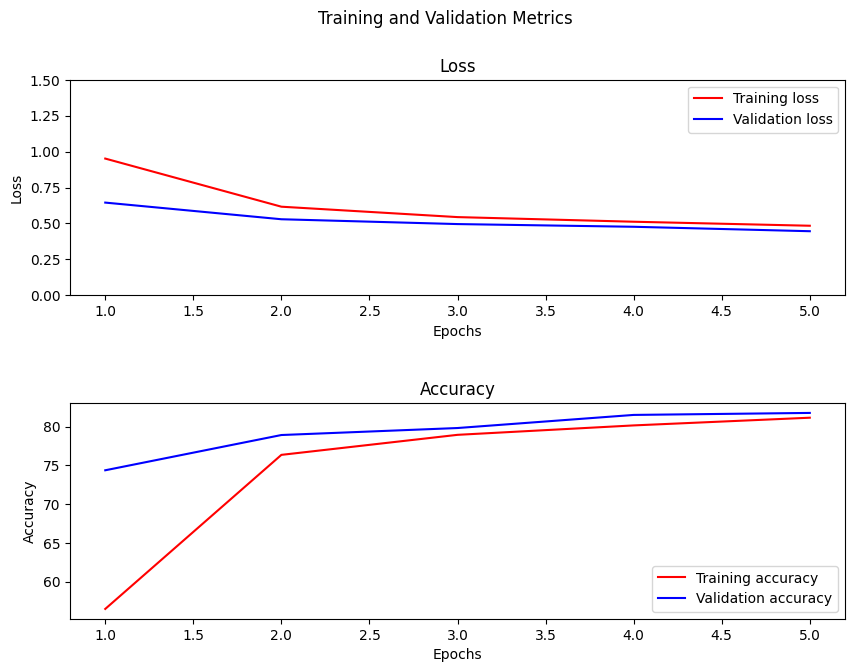

In [17]:
train_loss = train_history_loss
val_loss = val_history_loss
train_acc = train_history_accuracy
val_acc = val_history_accuracy

epochs = range(1, len(train_loss) + 1)

fig, axs = plt.subplots(2, figsize=(10, 7))
fig.suptitle('Training and Validation Metrics')


axs[0].plot(epochs, train_loss, label='Training loss', c='red')
axs[0].plot(epochs, val_loss, label='Validation loss', c='blue')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_ylim([0, 1.5])


axs[1].plot(epochs, train_acc, label='Training accuracy', c='red')
axs[1].plot(epochs, val_acc, label='Validation accuracy', c='blue')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.subplots_adjust(hspace=0.5)
plt.show()

<ipython-input-10-c7ef97848ada>:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(encoding['input_ids'].flatten()),
<ipython-input-10-c7ef97848ada>:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(encoding['attention_mask'].flatten()),


f1: 0.7649381088940654
f1: 0.7123267153887051


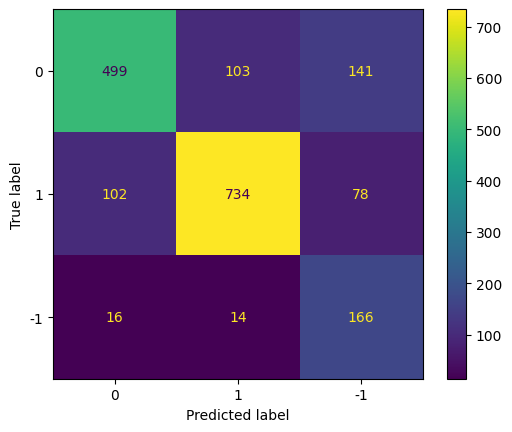

In [18]:
def get_model_predictions(model, data,  device):
    with torch.no_grad():
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['labels'].to(device)


        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        outputs_idx = logits.argmax(axis=1)
        return outputs_idx.cpu().tolist()

model1.eval()
eval_outputs=[]
eval_labels=[]
for i, data in enumerate(test_dataloader, 0):
    outputs_idx = get_model_predictions(model1, data,  device)

    eval_outputs+=outputs_idx
    eval_labels+=data['labels'].tolist()
ConfusionMatrixDisplay(confusion_matrix(eval_labels, eval_outputs), display_labels=['0', '1', '-1']).plot()
print("f1:",f1_score(eval_labels, eval_outputs, average='weighted'))
print("f1:",f1_score(eval_labels, eval_outputs, average='macro'))

In [19]:
n = 0
for i in range(len(eval_outputs)) :
  if(eval_labels[i] != eval_outputs[i]):
    print(f"True Label: {eval_labels[i]}, Predicted Label: {eval_outputs[i]}")
    print(train_texts1[i])
    print("")
    n += 1
    if(n> 10):
      break

True Label: 2, Predicted Label: 0
البته يه بدي هم داره.

True Label: 1, Predicted Label: 0
ضبط ویدیویی هم می‌تواند با رزولوشن VGA و سرعت 25 فریم بر ثانیه انجام گیرد.

True Label: 1, Predicted Label: 0
اولا: تصوير برداري با ان بسيار سخت ميباشد به دليل نداشتن دکمه تله وايد روي دستگاه و سفت بودن رينگ زوم روي لنز اورجينال که چرخاندن ان و تله وايد کردن باعث تکان خوردن دوربين شده و تصوير را خراب ميکند و در ضمن صداي ان هم درتصوير ضبط ميشود.

True Label: 0, Predicted Label: 1
سيستم عامل اندرويد خيلي باگ ها داره که هنوز هم برطرف نشده ،  براي مثال برنامه ي اتصال به اينترنتش يا برنامه ي مپ که بسيار کند و کسل کننده است.

True Label: 1, Predicted Label: 2
من تا الان بیش از 5000 عکس باهاش ​​گرفتم. من واقعا ازش راضیم و خیلی دوستش دارم. اگه باید عوضش کنم با a77 عوضش میکنم. با تشکر از دیجی کالا که در انتخاب کمک زیادی می کند.

True Label: 0, Predicted Label: 1
از صداش هم خوشم نيومد .

True Label: 0, Predicted Label: 1
این بار نیز این کمپانی طراحی و تولید تبلت خود را به شرکت Asus سپرد که خود در حال حاضر 